In [15]:
%run init.ipynb

### Notas de aula de Computação Quântica <br> Autor: Jonas Maziero

# Esfera de Bloch

Como vimos, qualquer _matriz densidade_ de um sistema de 2 níveis pode ser escrita como
$$\rho=\frac{1}{2}\big(I+\langle X\rangle X+\langle Y\rangle Y+\langle Z\rangle Z\big)=:\frac{1}{2}\big(I+x X+y Y+z Z\big),$$
com
$$\langle O\rangle=Tr(O\rho).$$

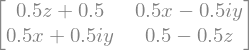

In [16]:
X = Matrix([[0,1],[1,0]]); Y = Matrix([[0,-1j],[1j,0]]); Z = Matrix([[1,0],[0,-1]]); I = Matrix([[1,0],[0,1]])
x,y,z=symbols('x y z'); rho = (1/2)*(x*X+y*Y+z*Z+I); rho

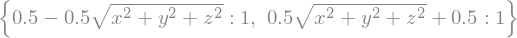

In [17]:
rho.eigenvals()

Definindo 
$$r=\sqrt{x^{2}+y^{2}+z^{2}},$$ 
vemos que os autovalores de $\rho$ são iguais a 
$$\lambda_{\pm}=\frac{1\pm r}{2}.$$
Como esses autovalores não podem ser negativos, devemos ter
$$r\le 1.$$

Ou seja, em $\mathbb{R}^{3}$, as coordenadas $(x,y,z)$ devem estar dentro de uma bola de raio igual a 1. Se estiver fora dessa bola, a matriz $\rho$ não é um estado fisicamente aceitável pois um autovalor/probabilidade é negativo e o outro é maior que 1, uma vez que 
$$Tr(\rho)=\lambda_{+}+\lambda_{-}=1.$$
Abaixo mostramos como podemos representar graficamente, com uma flecha, estados de um qubit na esfera de Bloch.

In [1]:
from qiskit.visualization import plot_bloch_vector

In [2]:
plot_bloch_vector([[0.5,0.5,0.3]])

/Users/jonasmaziero/opt/anaconda3/lib/python3.8/site-packages/qiskit/visualization/bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])


AttributeError: 'Arrow3D' object has no attribute 'do_3d_projection'

<Figure size 360x360 with 1 Axes>

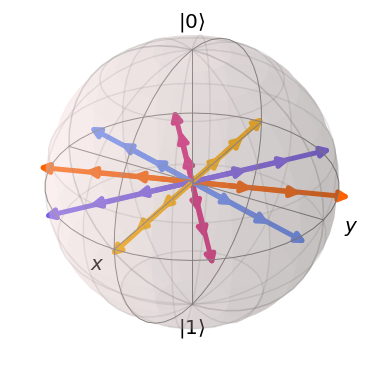

In [22]:
# Exemplo de representacao de vários estados na esfera de Bloch
points = []
r = 0.1; M = 3; dr = 1/M
for k in range(0, M):
    r += dr
    th = math.pi/2; ph = 0+k*0.01; N = 10; dph = 2*math.pi/N
    for j in range(0, N):
        ph += dph
        x = r*math.sin(th)*math.cos(ph); y = r*math.sin(th)*math.sin(ph); z = r*math.cos(th)
        points.append([x,y,z])
plot_bloch_vector(points)
#bb.savefig('blochb.pdf', format = 'png', dpi = 100)

## Estados puros

Para estados puros temos que
$$\rho=|\psi\rangle\langle\psi|\ \therefore\ \rho^{2}=|\psi\rangle\langle\psi|\psi\rangle\langle\psi|=|\psi\rangle\langle\psi|=\rho.$$
Portanto
$$Tr(\rho^{2})=Tr(\rho)=1.$$
Do código abaixo temos que (__Exercício:__ verifique esse resultado)
\begin{align}
& Tr(\rho^{2}) = \frac{1}{2}\big(1+x^{2}+y^{2}+z^{2}\big) = 1, \\
& \therefore x^{2}+y^{2}+z^{2}=r^{2}=1\ \therefore\ r=1.
\end{align}
Ou seja, estados puros são representados por pontos na superfície da bola de Bloch.

In [23]:
trace(rho**2)